# P2C3: Classifiez avec la Régression Logistique


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P2C3_classification_regression_logistique.ipynb)

Prenons un exemple avec le modèle de sklearn LogisticRegression

Considérons le dataset du cancer du sein disponible directement dans sklearn.

Ce dataset a 569 échantillons, 30 prédicteurs et une variable cible binaire : la tumeur est maligne (aïe, 1) ou bénigne (ouf, 0)


In [1]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)


In [2]:
X.shape

(569, 30)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
# split train, test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Regression Logistique

In [5]:
from sklearn.linear_model import LogisticRegression

# initialisation et entraînement en une ligne
clf = LogisticRegression(random_state=808).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Prediction d'un échantillon
print("Prédiction",clf.predict([X[8, :]])[0])

print("Probabilité",clf.predict_proba([X[8, :]])[0][0])



Prédiction 0
Probabilité 0.705876904130814


On obtient 0, soit bénigne avec un probabilité de 79,3%



In [7]:
# Prediction d'un autre échantillon
print("Prédiction",clf.predict([X[13, :]])[0])

print("Probabilité",clf.predict_proba([X[13, :]])[0][1])



Prédiction 1
Probabilité 0.8052056695423051


On obtient 1, soit maligne avec un probabilité de 87,3%


Un bon moyen d'analyser les performances d'un modèle de classification est de tracer l'histogramme des probabilités des prédictions.




<Axes: ylabel='Count'>

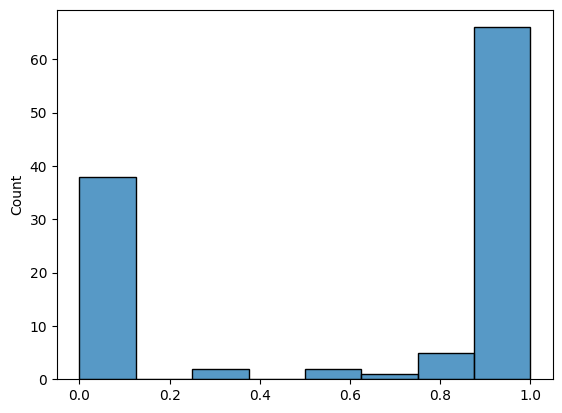

In [8]:
y_hat_proba = clf.predict_proba(X_test)[:,1]
import seaborn as sns
sns.histplot(y_hat_proba)

Le modèle est assez confiant de ses prédiction, la plupart des prédictions ont une probabilité proche de 0 ou de 1

## Accuracy

In [9]:
# predictions
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy",accuracy_score(y_test, y_pred))


accuracy 0.956140350877193


0.965 pas mal!

## Matrice de confusion

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 1, 70]])

## Seuil de séparation des classes

Comparons la matrice de confusion et les scores obtenus pour differents seuil de classification

In [11]:
# Probabilité de la classe 1
y_hat_proba = clf.predict_proba(X_test)[:,1]

In [12]:
# classes prédites pour les  seuils 0.3 et 0.7

y_pred_03 = [ 0 if value < 0.3 else 1 for value in y_hat_proba ]
y_pred_07 = [ 0 if value < 0.7 else 1 for value in y_hat_proba ]

In [13]:
# Matrice de confusion pour le seuil 0.3

confusion_matrix(y_test, y_pred_03)

array([[38,  5],
       [ 0, 71]])

In [14]:
# Matrice de confusion pour le seuil 0.7

confusion_matrix(y_test, y_pred_07)

array([[41,  2],
       [ 1, 70]])

## Autres metriques de classification
Precision, Recall et ROC_AUC


In [15]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Precision: 0.9459459459459459
Recall: 0.9859154929577465
ROC-AUC 0.9977071732721913


### Courbe ROC

Text(0.5, 1.0, 'ROC curve')

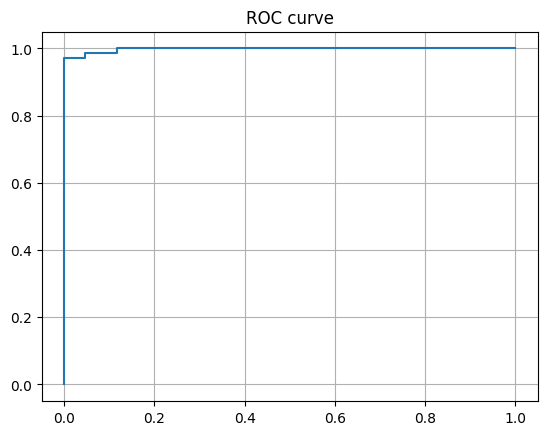

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC curve")

## Classification sur le dataset IRIS

Le dataset [IRIS](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) est disponible dans scikit-learn

In [17]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [18]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [19]:
# entrainons le modele

clf = LogisticRegression(random_state=8).fit(X_train, y_train)

In [20]:
# prediction sur le set de test

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [21]:
# Matrice de confusion
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  2,  9]])

Comme il y a  3 classes à prédire, la matrice de confusion est une matric 3x3

In [22]:

print("ROC-AUC", roc_auc_score(y_test, clf.predict_proba(X_test),multi_class='ovr'))

ROC-AUC 0.9865657409517059


##  classification report
Le classification report donne differentes metriques pour chacune des classes.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

